In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import shutil

src = "/kaggle/input/teethdata"
dest = "/kaggle/working/teethdata"

shutil.copytree(src, dest)

'/kaggle/working/teethdata'

In [3]:
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/out
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/output
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/outputs
!rm -rf /kaggle/working/teethdata/Teeth_Dataset/Testing/output_image.jpg

In [4]:
train_path = "/kaggle/working/teethdata/Teeth_Dataset/Training"
valid_path = "/kaggle/working/teethdata/Teeth_Dataset/Validation"
test_path = "/kaggle/working/teethdata/Teeth_Dataset/Testing"


In [5]:
train_labels = os.listdir(train_path)
valid_labels = os.listdir(valid_path)
test_labels = os.listdir(test_path)

In [6]:
print("Labels in train data", train_labels)
print("Labels in validation data", valid_labels)
print("Labels in test data", test_labels)

Labels in train data ['Gum', 'OC', 'OT', 'MC', 'CaS', 'OLP', 'CoS']
Labels in validation data ['Gum', 'OC', 'OT', 'MC', 'CaS', 'OLP', 'CoS']
Labels in test data ['Gum', 'OC', 'OT', 'MC', 'CaS', 'OLP', 'CoS']


In [8]:
total_train_bytes = sum(os.path.getsize(os.path.join(train_path, label, image)) for label in train_labels for image in os.listdir(os.path.join(train_path, label)))
print('Total Train data size = ', round(total_train_bytes / (1024 * 1024), 2), "Megabytes")

Total Train data size =  26.5 Megabytes


In [6]:
samples_label_train = []
print("# of Samples of each labels : ")
for label in train_labels:
    num_samples = len(os.listdir(os.path.join(train_path, label )))
    print(f"{label} = ", num_samples)
    samples_label_train.append((label,num_samples))

# of Samples of each labels : 
Gum =  360
CoS =  450
CaS =  480
OT =  393
OLP =  540
MC =  540
OC =  324


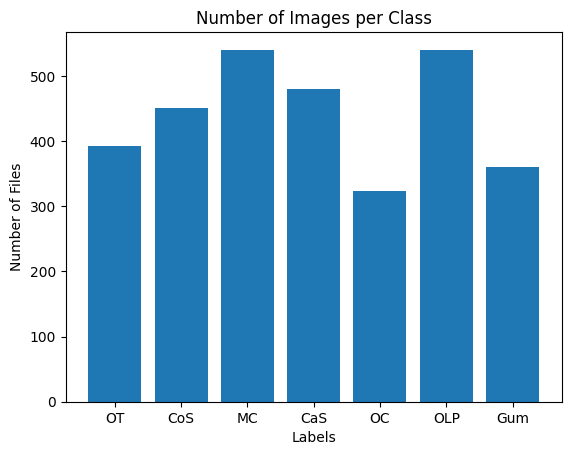

In [6]:
# Compute the number of files for each label
sizes = [len(os.listdir(os.path.join(train_path, label))) for label in train_labels]

# Create the bar chart
plt.bar(train_labels, sizes)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Number of Images per Class')

# Show the plot
plt.show()

In [7]:
#@title **Plot Function**

# Function to plot four random examples from each label
def plot_images(target_directory, num_examples=4, title="Data"):
    fig, axs = plt.subplots(len(labels), num_examples, figsize=(12, 10))
    fig.suptitle(title)

    # Iterate over each label
    for i, label in enumerate(labels):
        label_directory = os.path.join(target_directory, label)
        image_files = os.listdir(label_directory)
        np.random.shuffle(image_files)
        image_files = image_files[:num_examples]

        # Iterate over each image file
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(label_directory, image_file)
            image = plt.imread(image_path)

            # Plot the image
            ax = axs[i, j]
            ax.imshow(image)
            ax.axis('off')

            # Add label as the title
            if j == 0:
                ax.set_title(label)

    fig.tight_layout()
    plt.show()

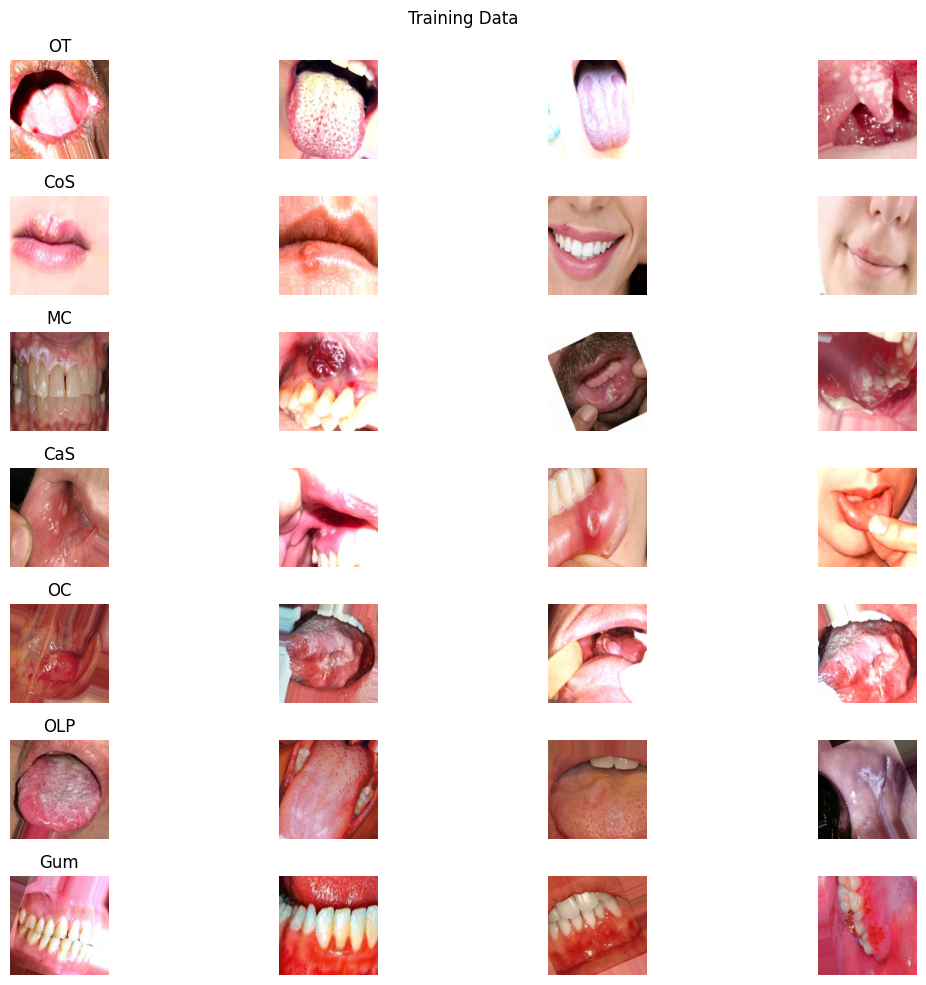

In [12]:
labels = os.listdir(train_path)
plot_images(target_directory=train_path,
            num_examples = 4,
            title="Training Data" )

In [13]:
#@title **Some Shapes of Images**
import matplotlib.image as mpimg
for label in os.listdir(train_path):
    print(f"------------------- {label} -----------------------")
    for ind in range(6):
        image_path = os.path.join(f"{train_path}/{label}", os.listdir(f"{train_path}/{label}")[ind])

        # Load image using matplotlib
        image = mpimg.imread(image_path)

        # Get shape of the image
        shape = image.shape
        print("Shape of the image:", shape)

------------------- OT -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CoS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- MC -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

------------------- CaS -----------------------

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

Shape of the image: (256, 256, 3)

S

In [111]:
import cv2
import tensorflow as tf

def preprocess_image(image_path, target_size=(256, 256, 3)):
    # Load the image using OpenCV (reads in BGR format)
    image = cv2.imread(image_path)

    # Resize the image if it's not already the target size
    if image.shape != target_size:
        image = cv2.resize(image, target_size)

    # Convert the image from BGR to RGB (Keras and TensorFlow expect RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalize the pixel values to the range [0, 1]
    image = image / 255.0

    # Convert the image to a TensorFlow tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    return image

def preprocess_images(image_paths, target_size=(256, 256)):
    # Preprocess each image and stack them into a batch
    images = [preprocess_image(path, target_size) for path in image_paths]
    return tf.stack(images)

In [112]:
# Initialize lists to hold image paths and labels
allTrain_imgPaths, tr_labels = [], []

# Iterate over the labels and collect image paths and labels
for label in train_labels:  
    label_path = os.path.join(train_path, label)
    for image in os.listdir(label_path):
        allTrain_imgPaths.append(os.path.join(label_path, image))
        tr_labels.append(label)

# Preprocess images
train_images = preprocess_images(allTrain_imgPaths)

# Print the shape of the preprocessed images
print(train_images.shape)  # Should be (3087, 256, 256, 3)


(3087, 256, 256, 3)


In [113]:
allValid_imgPaths, val_labels = [], []
for label in valid_labels:
  for image in os.listdir(os.path.join(valid_path, label)):
    allValid_imgPaths.append(os.path.join(valid_path, label, image))
    val_labels.append(label)
val_images = preprocess_images(allValid_imgPaths)
# Check the shape of the batch of images
print(val_images.shape)

(1028, 256, 256, 3)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=45,          # Random rotations from 0 to 45 degrees
    zoom_range=0.2,             # Random zoom within 20%
    horizontal_flip=True,       # Randomly flip images horizontally
    shear_range=0.2,            # Random shear transformations
    rescale=1/255,              # Rescale pixel values to [0, 1]
)


In [12]:
train_aug = dataGen.flow_from_directory(
    train_path,
    batch_size=32,
    target_size=(256, 256),
    class_mode="categorical",
    shuffle=False  # Set to False to maintain order for combining
)

Found 3087 images belonging to 7 classes.


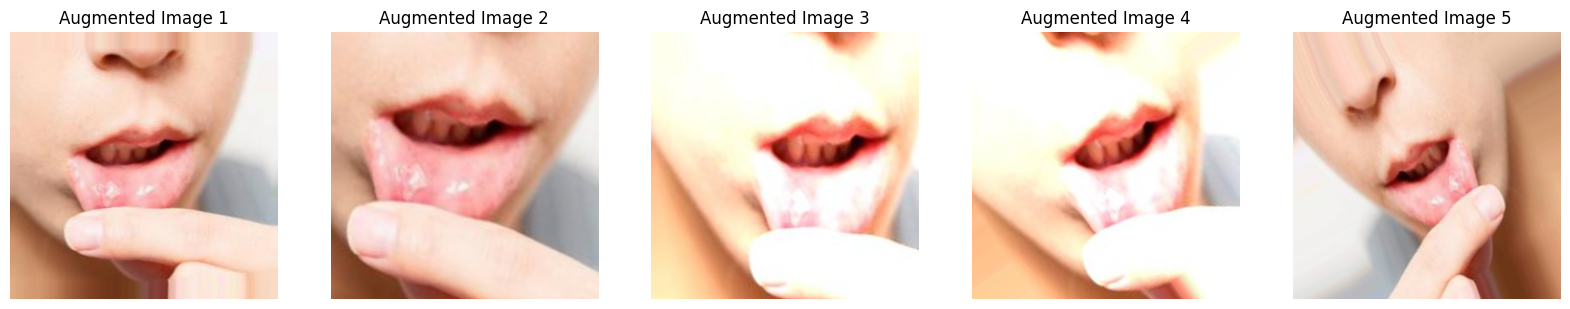

In [26]:
# Plot the first 5 images from the batch
aug_img, aug_label = next(train_aug)
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(20, 20))

for i in range(num_images_to_plot):
    axes[i].imshow(aug_img[i])  # Access the i-th image in the batch
    axes[i].axis('off')  # Hide axis
    axes[i].set_title(f"Augmented Image {i+1}")

plt.show()

In [11]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocess Original Images
x_train_original = np.array(train_images)
y_train_original = np.array(tr_labels)

# Step 2: Convert string labels to integer labels using LabelEncoder
label_encoder = LabelEncoder()
y_train_original_encoded = label_encoder.fit_transform(y_train_original)

# Step 3: One-hot encode the integer labels
num_classes =7  
y_train_original_onehot = to_categorical(y_train_original_encoded, num_classes=num_classes)

print("Shape of original training images: ", x_train_original.shape)
print("Shape of one-hot encoded original training labels: ", y_train_original_onehot.shape)

Shape of original training images:  (3087, 256, 256, 3)
Shape of one-hot encoded original training labels:  (3087, 7)


In [115]:
# Convert lists to NumPy arrays (validation set)
x_val = np.array(val_images)
y_val = np.array(val_labels)

print("Shape of validation images: ", x_val.shape)
print("Shape of validation labels: ", y_val.shape)

# Ensure that labels are strings if not already
if y_val.dtype != 'str':
    y_val = y_val.astype(str)

# Encode labels to integers (validation set)
label_encoder = LabelEncoder()
y_encoded_val = label_encoder.fit_transform(y_val)

# Convert labels to one-hot encoded format (validation set)
num_classes = len(np.unique(y_encoded_val))  # Number of unique classes
y_one_hot_val = tf.keras.utils.to_categorical(y_encoded_val, num_classes=num_classes)



Shape of validation images:  (1028, 256, 256, 3)
Shape of validation labels:  (1028,)


In [13]:
# Step 4: Augment Images


# Initialize lists to collect augmented data
augmented_images, augmented_labels = [], []

# Generate augmented data
for _ in range(len(train_aug)):
    aug_images, aug_labels = next(train_aug)
    augmented_images.extend(aug_images)
    augmented_labels.extend(aug_labels)

x_train_augmented = np.array(augmented_images)
y_train_augmented = np.array(augmented_labels)

print("Shape of augmented training images: ", x_train_augmented.shape)
print("Shape of augmented training labels: ", y_train_augmented.shape)

Shape of augmented training images:  (3087, 256, 256, 3)
Shape of augmented training labels:  (3087, 7)


In [14]:
# Step 5: Combine Original and Augmented Data
x_train_combined = np.concatenate((x_train_original, x_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train_original_onehot, y_train_augmented), axis=0)

print("Shape of combined training images: ", x_train_combined.shape)
print("Shape of combined training labels: ", y_train_combined.shape)




Shape of combined training images:  (6174, 256, 256, 3)
Shape of combined training labels:  (6174, 7)


In [33]:
y_train_combined

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [35]:
y_one_hot_val

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [88]:
from tensorflow.keras import regularizers, layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
# Define the model
input_shape = (256, 256, 3)
num_classes = 7  # Replace with the actual number of classes





model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Additional Convolutional Layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Global Average Pooling
    tf.keras.layers.GlobalAveragePooling2D(),

    # Fully Connected Layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),  # Adjusted dropout rate

    # Output Layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Compile the model with an adjusted learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

In [116]:
y_train_indices = np.argmax(y_train_original_onehot, axis=1)

In [18]:
y_val_indices = np.argmax(y_one_hot_val, axis=1)

In [28]:
y_train_indices.shape

(6174,)

In [29]:
y_val_indices.shape

(1028,)

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the weights of the model from the best epoch
)


# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),  # Unique class indices
    y=y_train_indices  # Class indices
)

# Convert to dictionary
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)




{0: 0.91875, 1: 0.98, 2: 1.225, 3: 0.8166666666666667, 4: 1.3611111111111112, 5: 0.8166666666666667, 6: 1.1221374045801527}


In [34]:
y_train_combined.shape, x_train_combined.shape, x_val.shape, y_one_hot_val.shape

((6174, 7), (6174, 256, 256, 3), (1028, 256, 256, 3), (1028, 7))

In [31]:
x_train_original.shape, y_train_original_onehot.shape

((3087, 256, 256, 3), (3087, 7))

In [37]:
# Train the model with early stopping and class weights
history = model.fit(
    x_train_original,
    y_train_original_onehot,
    epochs=40,
    batch_size=32,
    validation_data=(x_val, y_one_hot_val),
    class_weight=class_weights_dict,  # Adding class weights here
    callbacks=[early_stopping]
)


Epoch 1/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.2510 - loss: 7.4853 - val_accuracy: 0.1449 - val_loss: 7.3635
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.3859 - loss: 6.7596 - val_accuracy: 0.1449 - val_loss: 7.6325
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4328 - loss: 6.3413 - val_accuracy: 0.1449 - val_loss: 7.5055
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4711 - loss: 6.0207 - val_accuracy: 0.1809 - val_loss: 6.9809
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5027 - loss: 5.6970 - val_accuracy: 0.3531 - val_loss: 5.9079
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4939 - loss: 5.4423 - val_accuracy: 0.4212 - val_loss: 5.4760
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5253 - loss: 5.1643 - val_accuracy: 0.4339 - val_loss: 5.1793
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5454 - loss: 4.9198 - val_accuracy: 0.4650 -

In [45]:
# Train the model with early stopping and class weights
history = model.fit(
    x_train_original,
    y_train_original_onehot,
    epochs=60,
    batch_size=32,
    validation_data=(x_val, y_one_hot_val),
    class_weight=class_weights_dict,  # Adding class weights here
   # callbacks=[early_stopping]
)

Epoch 1/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 118ms/step - accuracy: 0.2416 - loss: 7.4577 - val_accuracy: 0.1449 - val_loss: 7.4694
Epoch 2/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.3689 - loss: 6.8224 - val_accuracy: 0.1449 - val_loss: 8.0520
Epoch 3/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4292 - loss: 6.4125 - val_accuracy: 0.1411 - val_loss: 8.1293
Epoch 4/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4728 - loss: 6.0513 - val_accuracy: 0.1780 - val_loss: 7.3840
Epoch 5/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4797 - loss: 5.7900 - val_accuracy: 0.2500 - val_loss: 6.4826
Epoch 6/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5169 - loss: 5.4681 - val_accuracy: 0.3930 - val_loss: 5.6386
Epoch 7/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5402 - loss: 5.2128 - val_accuracy: 0.5107 - val_loss: 5.1797
Epoch 8/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5222 - loss: 4.9982 - val_accuracy: 0.5827 -

In [20]:
# Train the model with early stopping and class weights
history = model.fit(
    x_train_original,
    y_train_original_onehot,
    epochs=60,
    batch_size=32,
    validation_data=(x_val, y_one_hot_val),
    class_weight=class_weights_dict,  # Adding class weights here
    callbacks=[early_stopping]
)

Epoch 1/60


2024-08-28 07:21:49.506989: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2024-08-28 07:21:49.507044: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2024-08-28 07:21:49.507053: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2024-08-28 07:21:49.507061: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2024-08-28 07:21:49.507069: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2024-08-28 07:21:49.507077: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 5.39609, expected 4.67941
2024-08-28 07:21:49.507085: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 5.14673, expected 4.43005
2024-08-28 07:21:49.507093: E external/local_xla/

 3/97 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.0885 - loss: 7.7565  

I0000 00:00:1724829718.743715      85 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724829718.768992      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


95/97 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2532 - loss: 7.3578

2024-08-28 07:22:04.231242: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64516: 7.49268, expected 6.59709
2024-08-28 07:22:04.231308: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64517: 6.91026, expected 6.01467
2024-08-28 07:22:04.231320: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64527: 7.8036, expected 6.90801
2024-08-28 07:22:04.231329: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64528: 7.31195, expected 6.41636
2024-08-28 07:22:04.231338: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64535: 7.60682, expected 6.71123
2024-08-28 07:22:04.231348: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64536: 6.74057, expected 5.84498
2024-08-28 07:22:04.231356: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 64537: 7.1283, expected 6.23271
2024-08-28 07:22:04.231365: E

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.2544 - loss: 7.3533

2024-08-28 07:22:14.050489: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129063: 5.35229, expected 4.67255
2024-08-28 07:22:14.050555: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129317: 4.6381, expected 3.95836
2024-08-28 07:22:14.050567: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129442: 5.36458, expected 4.68484
2024-08-28 07:22:14.050576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129443: 5.7503, expected 5.07056
2024-08-28 07:22:14.050585: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129464: 5.45647, expected 4.77673
2024-08-28 07:22:14.050594: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129486: 5.67042, expected 4.99069
2024-08-28 07:22:14.050603: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129487: 5.79308, expected 5.11335
2024-08-28 07:22:14.05

97/97 ━━━━━━━━━━━━━━━━━━━━ 31s 171ms/step - accuracy: 0.2550 - loss: 7.3511 - val_accuracy: 0.1449 - val_loss: 7.4718
Epoch 2/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3982 - loss: 6.7243 - val_accuracy: 0.1449 - val_loss: 8.2163
Epoch 3/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.4456 - loss: 6.3375 - val_accuracy: 0.1449 - val_loss: 8.6208
Epoch 4/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4646 - loss: 5.9729 - val_accuracy: 0.1449 - val_loss: 8.0307
Epoch 5/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5106 - loss: 5.6427 - val_accuracy: 0.1741 - val_loss: 6.7242
Epoch 6/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5117 - loss: 5.4028 - val_accuracy: 0.4027 - val_loss: 5.5401
Epoch 7/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5324 - loss: 5.1305 - val_accuracy: 0.4747 - val_loss: 5.1665
Epoch 8/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5471 - loss: 4.9227 - val_accuracy: 0.5438 - val_loss: 

In [31]:
# Train the model with early stopping and class weights
history = model.fit(
    x_train_original,
    y_train_original_onehot,
    epochs=60,
    batch_size=32,
    validation_data=(x_val, y_one_hot_val),
    class_weight=class_weights_dict,  # Adding class weights here
    callbacks=[early_stopping]
)

Epoch 1/60
 3/97 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.1788 - loss: 7.8304 

W0000 00:00:1724830867.828031      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


97/97 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.2779 - loss: 7.3773 - val_accuracy: 0.1449 - val_loss: 7.3519
Epoch 2/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4203 - loss: 6.7262 - val_accuracy: 0.1449 - val_loss: 7.6146
Epoch 3/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4286 - loss: 6.3752 - val_accuracy: 0.1449 - val_loss: 7.9787
Epoch 4/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4920 - loss: 6.0209 - val_accuracy: 0.1488 - val_loss: 7.3150
Epoch 5/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5058 - loss: 5.6846 - val_accuracy: 0.2325 - val_loss: 6.3425
Epoch 6/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5264 - loss: 5.4081 - val_accuracy: 0.3628 - val_loss: 5.5940
Epoch 7/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5653 - loss: 5.1122 - val_accuracy: 0.5292 - val_loss: 5.0542
Epoch 8/60
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5629 - loss: 4.9264 - val_accuracy: 0.5837 - val_loss: 

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_one_hot_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9085 - loss: 1.5436
Validation Accuracy: 84.63%


In [46]:
# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_one_hot_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8710 - loss: 1.2057
Validation Accuracy: 80.45%


In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(x_val, y_one_hot_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9312 - loss: 1.0698
Validation Accuracy: 90.56%


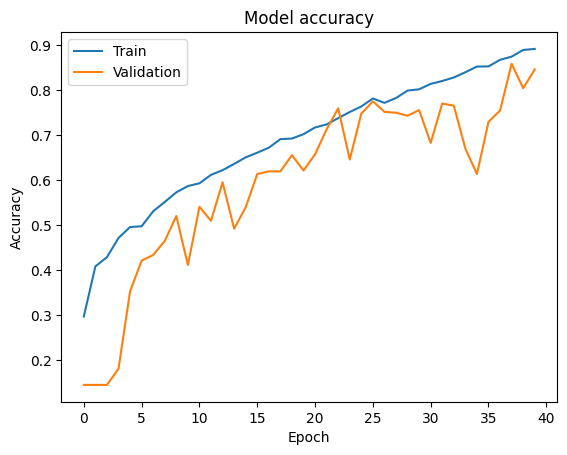

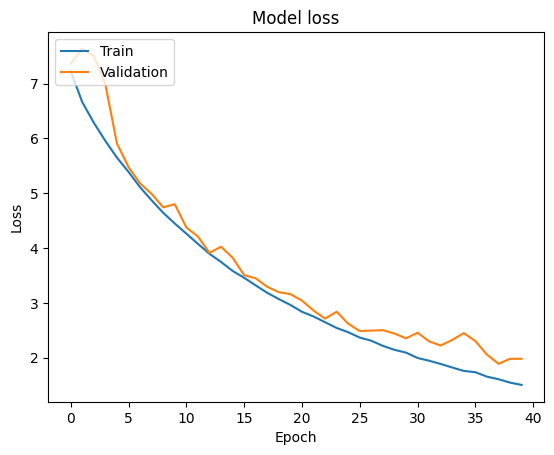

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

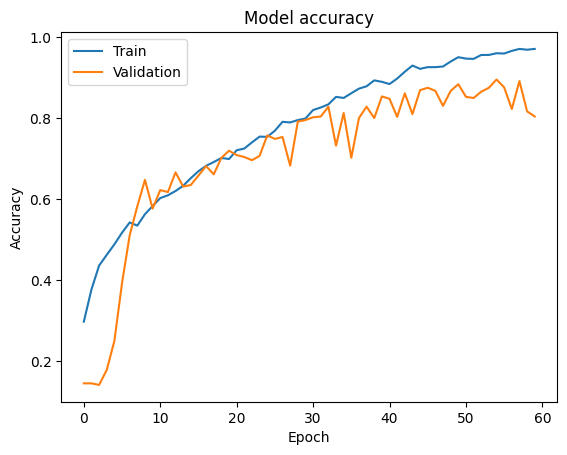

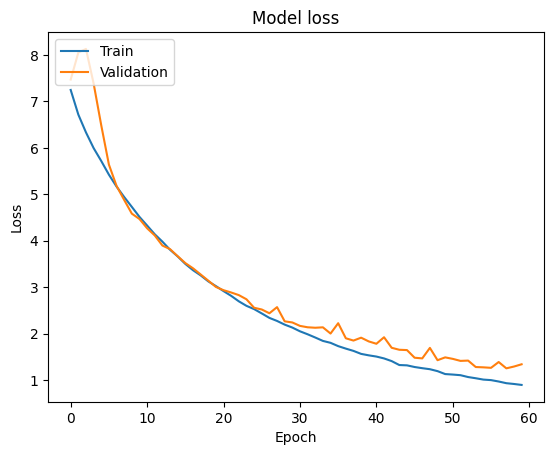

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

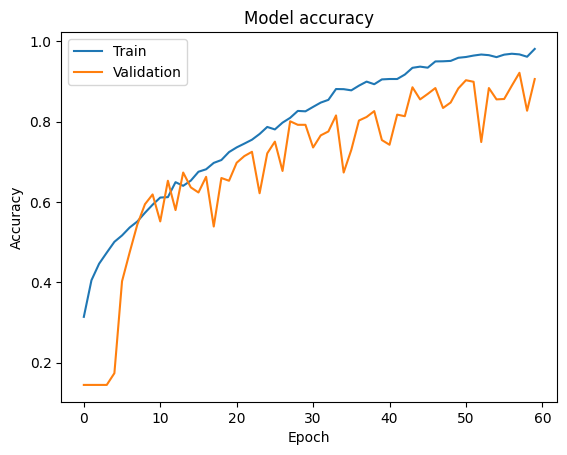

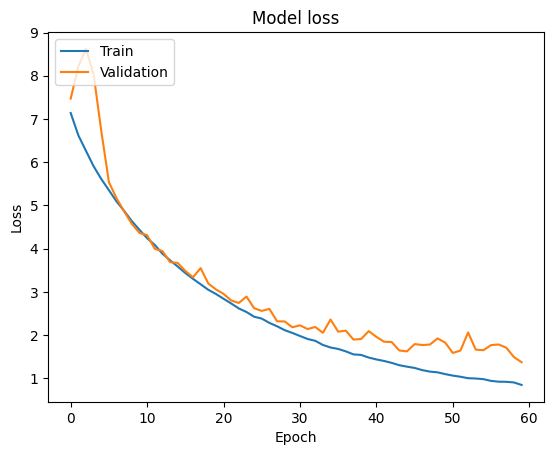

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

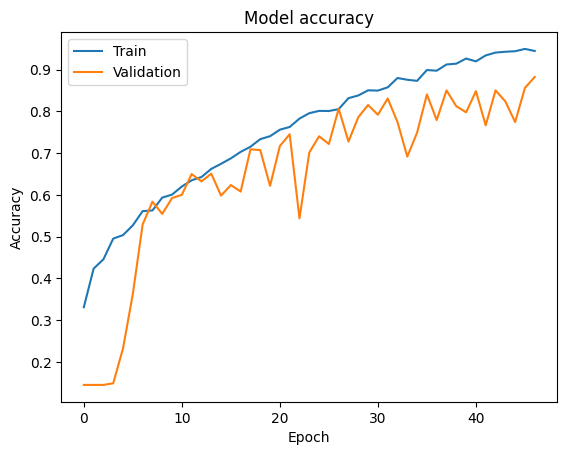

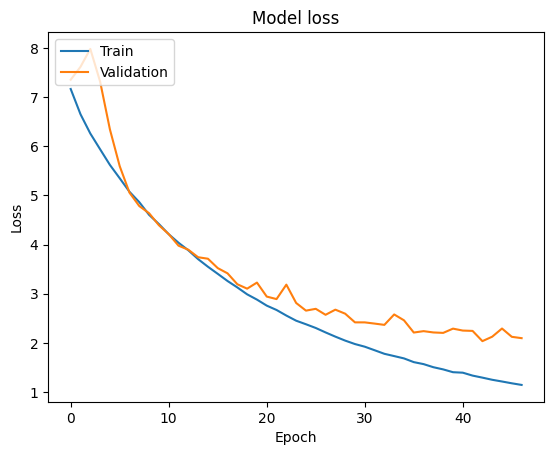

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
# Convert predicted labels to class indices
y_pred_classes = y_pred.argmax(axis=1)
y_pred_classes

NameError: name 'y_pred' is not defined

In [39]:
y_true

array(['OC', 'OC', 'OC', ..., 'OLP', 'OLP', 'OLP'], dtype='<U3')

33/33 ━━━━━━━━━━━━━━━━━━━━ 19s 579ms/step
              precision    recall  f1-score   support

         CaS       0.45      0.41      0.43       160
         CoS       0.58      0.81      0.67       149
         Gum       0.54      0.59      0.56       120
          MC       0.38      0.51      0.44       180
          OC       0.60      0.29      0.39       108
         OLP       0.47      0.54      0.50       180
          OT       0.74      0.26      0.38       131

    accuracy                           0.50      1028
   macro avg       0.54      0.49      0.48      1028
weighted avg       0.52      0.50      0.49      1028



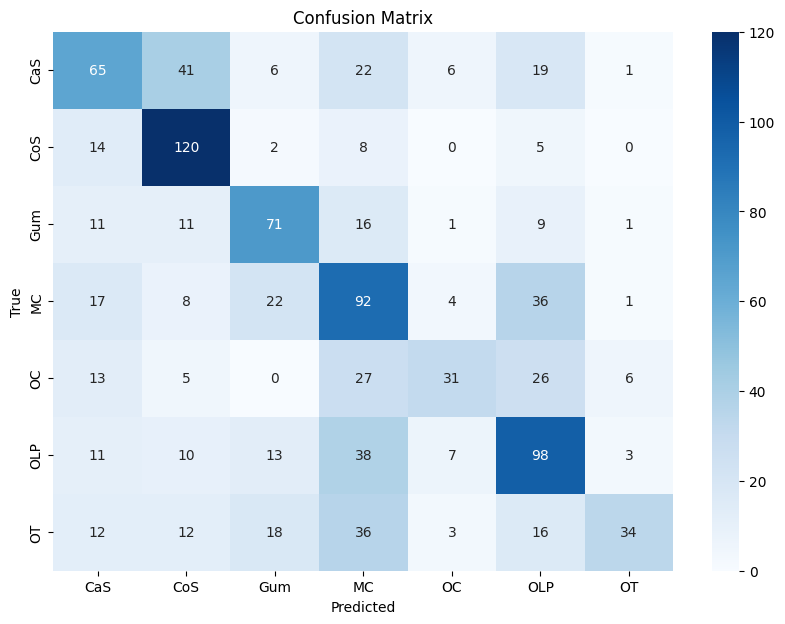

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for validation data
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Convert y_one_hot_val from one-hot encoding to class indices
y_true = np.argmax(y_one_hot_val, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
              precision    recall  f1-score   support

         CaS       0.90      0.91      0.91       160
         CoS       0.90      0.98      0.94       149
         Gum       0.84      0.98      0.91       120
          MC       0.94      0.83      0.88       180
          OC       0.90      0.91      0.90       108
         OLP       0.90      0.88      0.89       180
          OT       0.96      0.87      0.91       131

    accuracy                           0.91      1028
   macro avg       0.91      0.91      0.91      1028
weighted avg       0.91      0.91      0.91      1028



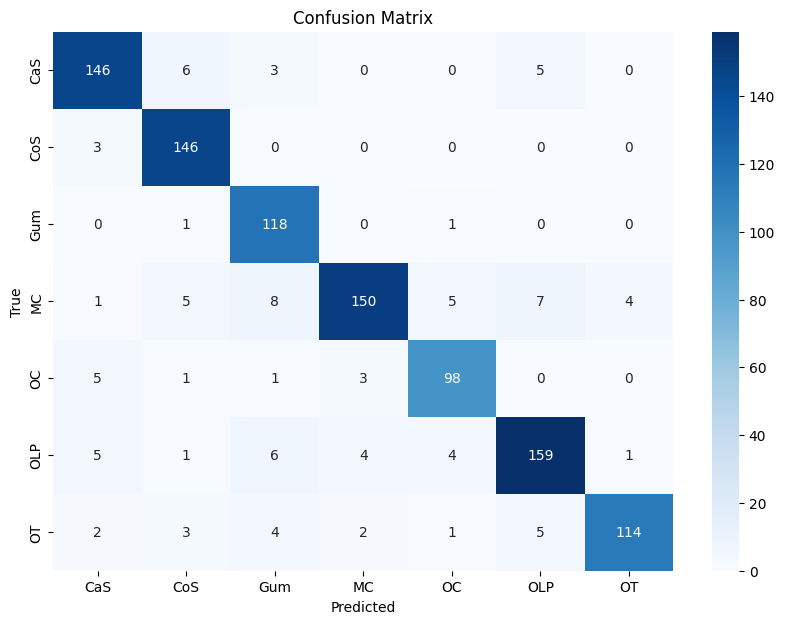

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for validation data
y_pred = model.predict(x_val)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Convert y_one_hot_val from one-hot encoding to class indices
y_true = np.argmax(y_one_hot_val, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# Save the entire model to a file
model.save('/kaggle/working/teethModel.h5')



# **Pretrained Model**


In [29]:
# impor libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam


In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1/255,
  
)

# Rescaling only for validation and test sets
test_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# Load the training data with augmentation
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load the validation and test data without augmentation
test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    "/kaggle/working/teethdata/Teeth_Dataset/Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [45]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_indices),  # Unique class indices
    y=y_train_indices  # Class indices
)
# Convert to dictionary
class_weights_dict = dict(enumerate(class_weights))

#   **Resnet-50**

In [96]:
# import resnet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3) )

# freezing weights of all layers except top(last)
for layer in base_model.layers:
    layer.trainable = False
    
# Add new layers into end of ResNet50
num_classes = 7
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64)(x)
x = Activation('relu')(x)    
x = Dense(128)(x)
x = Activation('relu')(x)  
x = Dense(256)(x)
x = Activation('relu')(x)  

predictions = Dense(num_classes, activation='softmax')(x)  # Output layer

# create final model
model_resnet = Model(inputs=base_model.input, outputs=predictions)

# compile the model
learning_rate = 0.005

# Compile the model with the custom learning rate
model_resnet.compile(optimizer=Adam(learning_rate=learning_rate), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])



In [98]:
# Train the model 
history = model_resnet.fit(train_generator, validation_data=valid_generator, epochs=100, class_weight=class_weights_dict, callbacks=[early_stopping], batch_size = 32)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 160ms/step - accuracy: 0.1471 - loss: 1.9834 - val_accuracy: 0.1751 - val_loss: 1.9453
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.1468 - loss: 1.9563 - val_accuracy: 0.1449 - val_loss: 1.9445
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.1732 - loss: 1.9362 - val_accuracy: 0.1556 - val_loss: 1.9459
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.1439 - loss: 1.9515 - val_accuracy: 0.1751 - val_loss: 1.9454
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.1382 - loss: 1.9427 - val_accuracy: 0.1167 - val_loss: 1.9468
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.1198 - loss: 1.9448 - val_accuracy: 0.1274 - val_loss: 1.9466


# **VGG16**

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers


In [32]:


# Load VGG16 model without the top layers and with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezing weights of all layers except top (last)
for layer in base_model.layers:
    layer.trainable = False

# Add new layers to the end of VGG16
num_classes = 7
x = base_model.output
x = Flatten()(x)  # Add a flattening layer
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)  # Add a dropout layer  
   
# Output layer
predictions = Dense(num_classes, activation='softmax')(x)




In [33]:
# Create the final model
model_vgg16 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
learning_rate = 0.0001
model_vgg16.compile(optimizer=Adam(learning_rate=learning_rate), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])



In [76]:
history = model_vgg16.fit(train_generator, validation_data=valid_generator, epochs=50, class_weight=class_weights_dict, callbacks=[early_stopping], batch_size = 32)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.2136 - loss: 1.9351 - val_accuracy: 0.4348 - val_loss: 1.4914
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4388 - loss: 1.4520 - val_accuracy: 0.6051 - val_loss: 1.2835
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.5352 - loss: 1.2506 - val_accuracy: 0.6732 - val_loss: 1.1377
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.5938 - loss: 1.1333 - val_accuracy: 0.7033 - val_loss: 1.0412
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6587 - loss: 0.9722 - val_accuracy: 0.7364 - val_loss: 0.9673
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6754 - loss: 0.9087 - val_accuracy: 0.7675 - val_loss: 0.8474
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7321 - loss: 0.7968 - val_accuracy: 0.7792 - val_loss: 0.7902
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7458 - loss: 0.7275 - val_accuracy: 0.7967 -

In [77]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model_vgg16.evaluate(valid_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8920 - loss: 0.3476
Validation Loss: 0.38020235300064087
Validation Accuracy: 0.881322979927063


In [83]:
model_vgg16.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,533,143 (74.51 MB)

 Trainable params: 1,606,151 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 3,212,304 (12.25 MB)

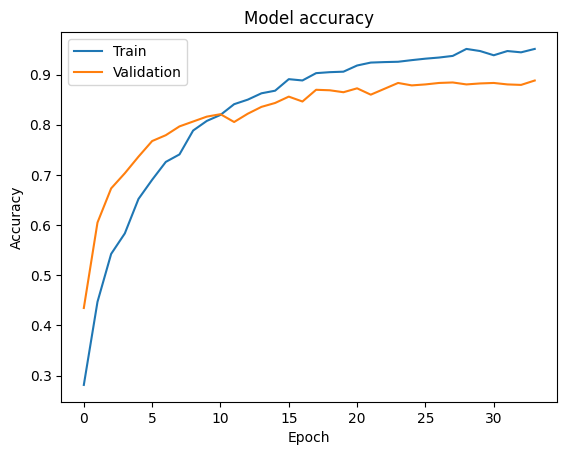

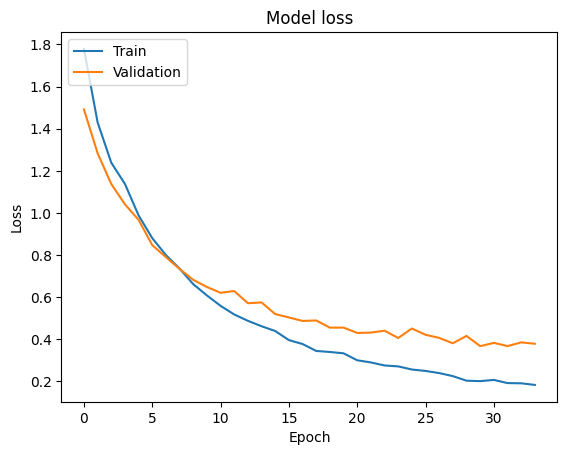

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
# Predict the classes for the test set
test_loss, test_accuracy = model_vgg16.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9102 - loss: 0.3010
Test Loss: 0.3402160704135895
Test Accuracy: 0.8988326787948608


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


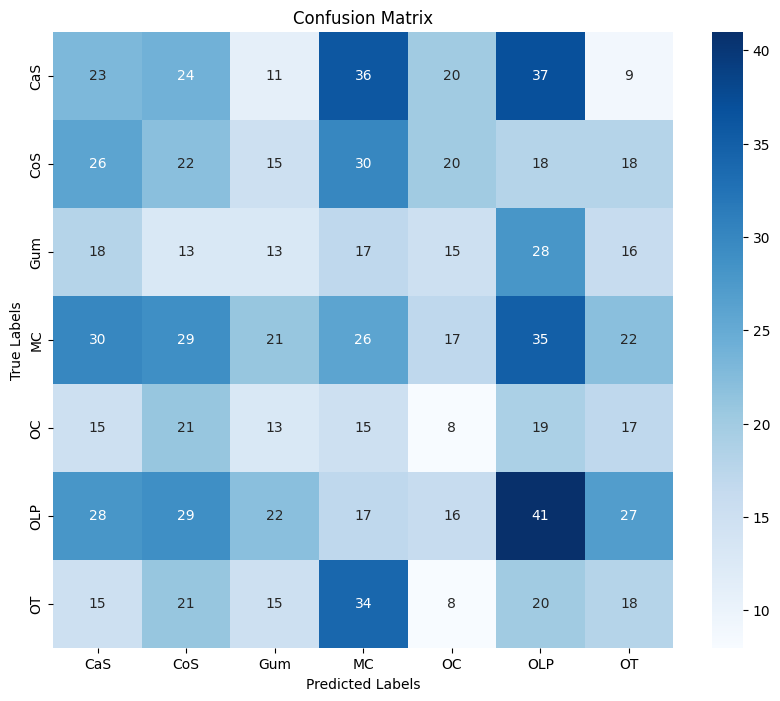

              precision    recall  f1-score   support

         CaS       0.15      0.14      0.15       160
         CoS       0.14      0.15      0.14       149
         Gum       0.12      0.11      0.11       120
          MC       0.15      0.14      0.15       180
          OC       0.08      0.07      0.08       108
         OLP       0.21      0.23      0.22       180
          OT       0.14      0.14      0.14       131

    accuracy                           0.15      1028
   macro avg       0.14      0.14      0.14      1028
weighted avg       0.15      0.15      0.15      1028



In [80]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred = model_vgg16.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [81]:
model_vgg16.save("/kaggle/working/vgg16_teeth.h5")

In [34]:
history = model_vgg16.fit(train_generator, validation_data=valid_generator, epochs=50, class_weight=class_weights_dict, callbacks=[early_stopping], batch_size = 32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.2056 - loss: 1.9328 - val_accuracy: 0.4689 - val_loss: 1.6359
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.3520 - loss: 1.6221 - val_accuracy: 0.5720 - val_loss: 1.4033
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.4655 - loss: 1.4061 - val_accuracy: 0.6449 - val_loss: 1.2365
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.5323 - loss: 1.2606 - val_accuracy: 0.6984 - val_loss: 1.1220
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.5833 - loss: 1.1417 - val_accuracy: 0.7198 - val_loss: 1.0336
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6315 - loss: 1.0138 - val_accuracy: 0.7636 - val_loss: 0.9624
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.6670 - loss: 0.9540 - val_accuracy: 0.7792 - val_loss: 0.8623
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6878 - loss: 0.8814 - val_accuracy: 0.7821 - val_loss: 

In [35]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model_vgg16.evaluate(valid_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.8938 - loss: 0.2955
Validation Loss: 0.33609920740127563
Validation Accuracy: 0.8822957277297974


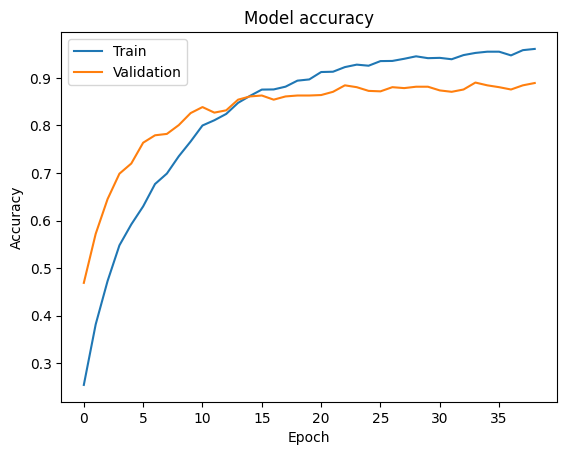

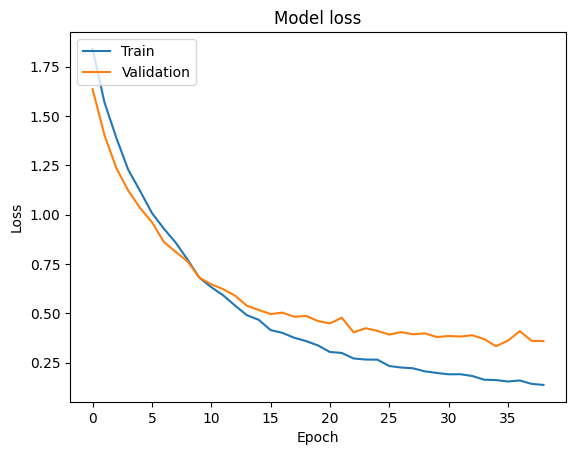

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
# Predict the classes for the test set
test_loss, test_accuracy = model_vgg16.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9033 - loss: 0.3028
Test Loss: 0.327313631772995
Test Accuracy: 0.9017509818077087


In [40]:
model_vgg16.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,538,711 (74.53 MB)

 Trainable params: 1,608,007 (6.13 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 3,216,016 (12.27 MB)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step


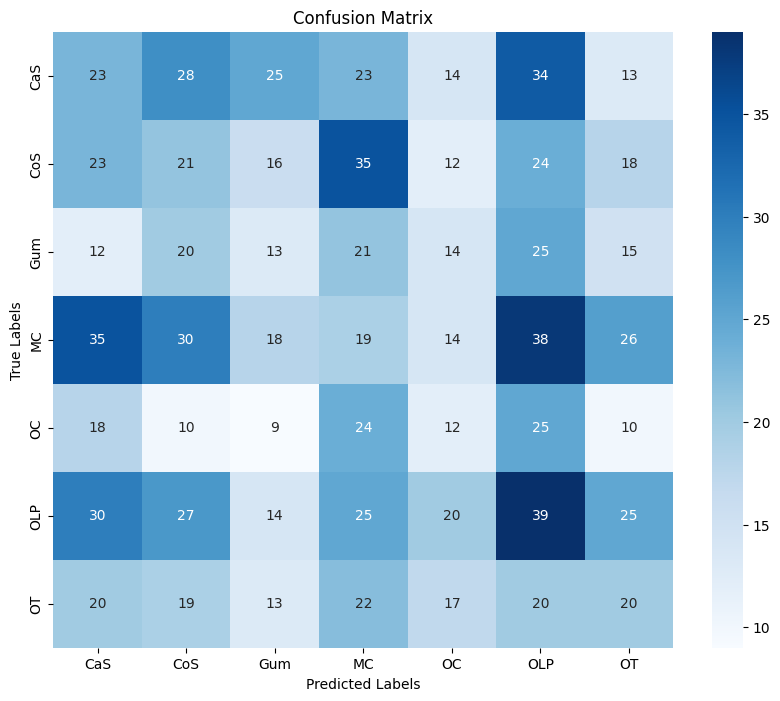

              precision    recall  f1-score   support

         CaS       0.14      0.14      0.14       160
         CoS       0.14      0.14      0.14       149
         Gum       0.12      0.11      0.11       120
          MC       0.11      0.11      0.11       180
          OC       0.12      0.11      0.11       108
         OLP       0.19      0.22      0.20       180
          OT       0.16      0.15      0.16       131

    accuracy                           0.14      1028
   macro avg       0.14      0.14      0.14      1028
weighted avg       0.14      0.14      0.14      1028



In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred = model_vgg16.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


# **Mobile-Net**

In [119]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.regularizers import l2


# Define the MobileNet model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of MobileNet with L2 regularization
mobilenet_model = tf.keras.Sequential([
    mobilenet_base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(7, activation='softmax', kernel_regularizer=l2(0.15))  # L2 regularization added here
])




In [120]:
# Compile the model
mobilenet_model.compile(optimizer= Adam(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



In [105]:
# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    batch_size=32
)



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 210ms/step - accuracy: 0.3401 - loss: 4.1977 - val_accuracy: 0.4270 - val_loss: 5.1348
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7502 - loss: 2.5878 - val_accuracy: 0.7198 - val_loss: 2.6596
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8853 - loss: 2.1044 - val_accuracy: 0.8589 - val_loss: 2.0619
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9496 - loss: 1.7828 - val_accuracy: 0.9387 - val_loss: 1.6887
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9633 - loss: 1.5779 - val_accuracy: 0.9747 - val_loss: 1.4739
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9827 - loss: 1.3736 - val_accuracy: 0.9737 - val_loss: 1.3028
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9892 - loss: 1.2090 - val_accuracy: 0.9796 - val_loss: 1.1413
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.9913 - loss: 1.0559 - val_accuracy: 0.9805 - val_loss: 

In [121]:
# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    batch_size=32
)



Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 204ms/step - accuracy: 0.3327 - loss: 4.3249 - val_accuracy: 0.3599 - val_loss: 5.1279
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7700 - loss: 2.5312 - val_accuracy: 0.6323 - val_loss: 2.8522
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.8950 - loss: 2.0504 - val_accuracy: 0.8512 - val_loss: 2.0569
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.9369 - loss: 1.7931 - val_accuracy: 0.9339 - val_loss: 1.6925
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9687 - loss: 1.5516 - val_accuracy: 0.9679 - val_loss: 1.4628
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9806 - loss: 1.3739 - val_accuracy: 0.9786 - val_loss: 1.2856
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.9891 - loss: 1.1971 - val_accuracy: 0.9757 - val_loss: 1.1316
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.9922 - loss: 1.0410 - val_accuracy: 0.9815 - val_loss: 

In [122]:
# Evaluate the model
loss, accuracy = mobilenet_model.evaluate(valid_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9868 - loss: 0.7384
Validation Loss: 0.7394683361053467
Validation Accuracy: 0.9873540997505188


In [123]:
# Predict the classes for the test set
test_loss, test_accuracy = mobilenet_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9834 - loss: 0.7360
Test Loss: 0.7442460060119629
Test Accuracy: 0.9795719981193542


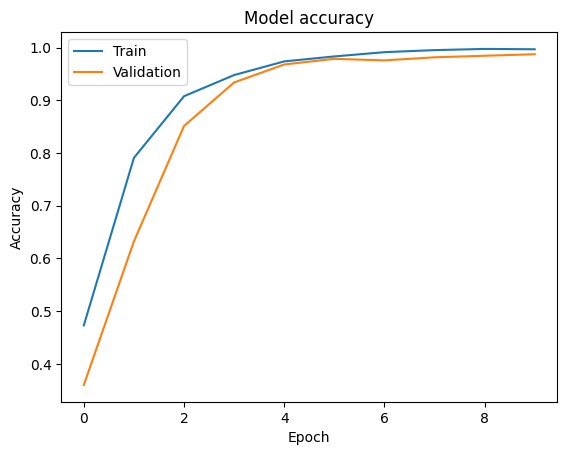

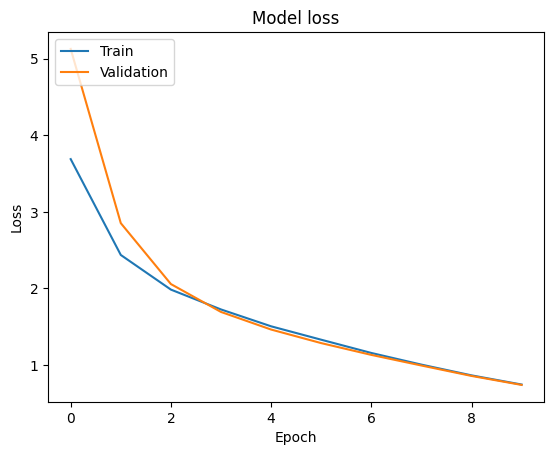

In [124]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [126]:
test_generator.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step


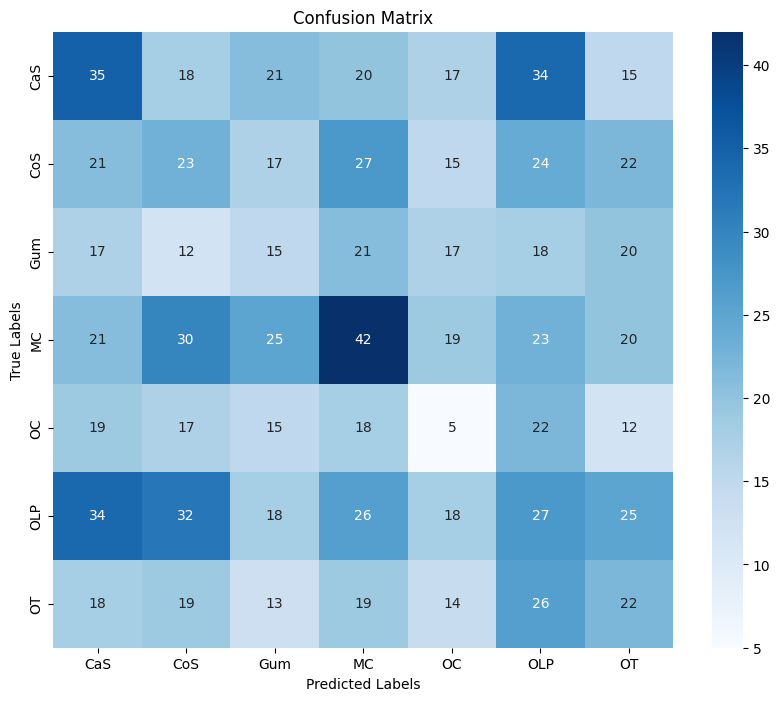

              precision    recall  f1-score   support

         CaS       0.21      0.22      0.22       160
         CoS       0.15      0.15      0.15       149
         Gum       0.12      0.12      0.12       120
          MC       0.24      0.23      0.24       180
          OC       0.05      0.05      0.05       108
         OLP       0.16      0.15      0.15       180
          OT       0.16      0.17      0.16       131

    accuracy                           0.16      1028
   macro avg       0.16      0.16      0.16      1028
weighted avg       0.16      0.16      0.16      1028



In [125]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the true labels and predictions for the test set
y_true = test_generator.classes  # True labels
y_pred = mobilenet_model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report for detailed metrics
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


In [110]:
mobilenet_model.save("/kaggle/working/mobile_net.h5")